<a href="https://colab.research.google.com/github/Y-Keles/Bachelor/blob/main/WaterWise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://i.ibb.co/v3vJ224/logo.png?raw=true" height="100" style="height:100px;margin-left: 0px;">

# **WaterWise** for water footprint calculation

**Authors**: Yunus Emre Keleş and Ömer Özdemir

- WaterWise is a computational tool for calculating the water footprint of individuals and communities. WaterWise offers an interactive interface that allows users to input their consumption habits and calculates the corresponding water footprint, including blue, green, and gray water components.
It provides detailed insights, both in numerical and visual formats, to support informed decisions towards more sustainable water usage.

- The calculations are based on world average water requirements for each unit of product, service, or activity.<br>
 **Data source** : UNESCO-IHE Institute for Water Education (2010 M.M. Mekonnen and A.Y. Hoekstra).


- Detailed step-by-step explanations of the WaterWise construction process are available in the accompanying [presentation](https://www.canva.com/design/DAGY5xS4S2A/rJG1Upgtdu7zYnQvuXZRzg/edit?utm_content=DAGY5xS4S2A&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton) and [report](https://docs.google.com/document/d/1kPfg138BvUPmbfmRId7nYq3ZAcBysxHEdVB7QoTALCY/edit?usp=sharing) files.


Water Footprint Details for Domestic:

Vegetables (kg):: 0.08 (m³)
Fruits (kg):: 0.00 (m³)
Creal products (kg):: 0.00 (m³)
Milk (litre):: 0.62 (m³)
Egg (unit):: 0.00 (m³)
Chicken meat (kg):: 0.00 (m³)
Sheep/Goat meat (kg):: 0.00 (m³)
Bovine meat (kg):: 0.00 (m³)
Dairy products (kg per week):: 0.00 (m³)
Cups of coffe:: 0.00 (m³)
Cups of tea:: 0.00 (m³)
Shower (minutes):: 3.30 (m³)
Laundry loads:: 0.00 (m³)
Dishwasher (minutes):: 0.00 (m³)
Car washes (frequency):: 0.00 (m³)

Total Water Footprint for Domestic: 4.01 (m³)



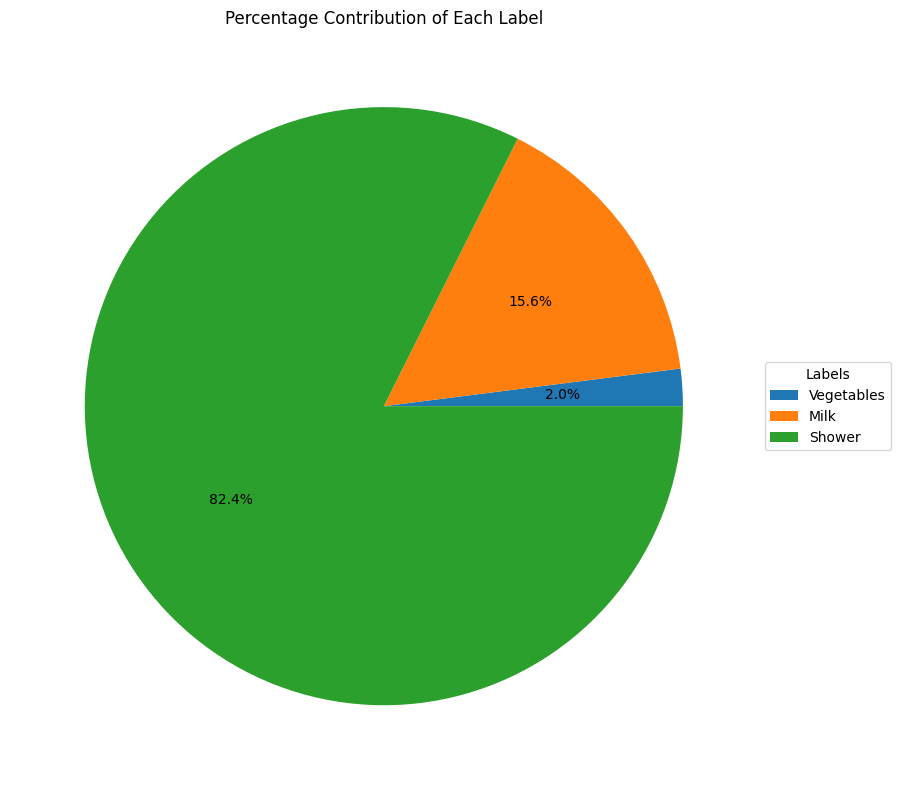

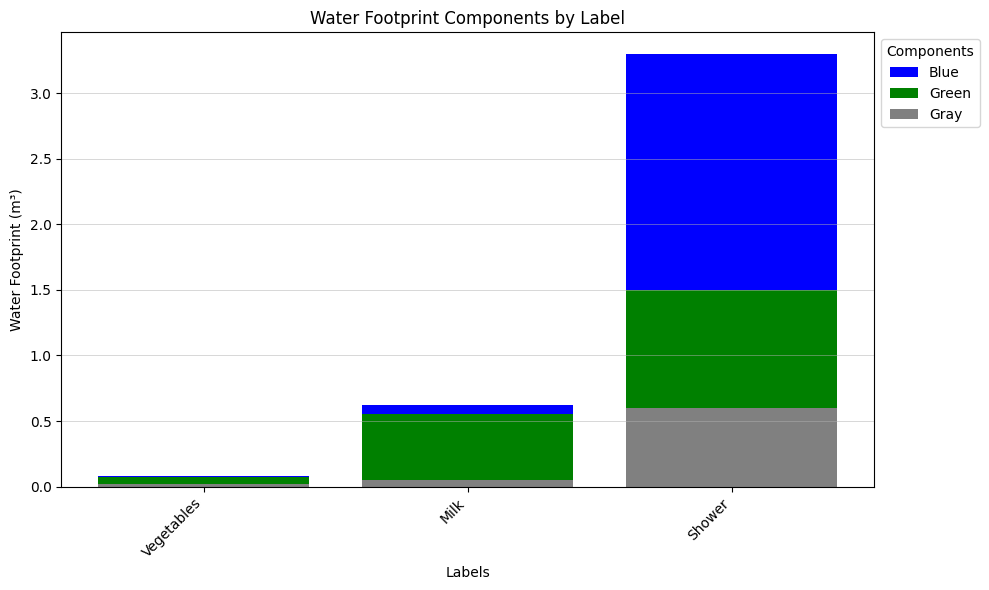

In [ ]:
#@title # WaterWise

#@markdown Your individual water footprint is equal to the water required to produce the goods and services consumed by you.<br>
#@markdown Please take your time to use the water footprint calculator to assess your own unique water footprint.<br>
#@markdown **Note: Put decimals behind a point, not a comma (e.g. write 1.5 and not 1,5).**


#@markdown - **Domestic:** Individuals or households. Focuses on personal water use, such as drinking, cooking, cleaning, and other day-to-day activities.

#@markdown - **Agriculture:** Farmers or agricultural workers. Involves water use for irrigation and crop production.

#@markdown - **Industry:** Businesses or industrial facilities. Includes water use in manufacturing and waste management.


# INSTALLING REQUIRED PYTHON LIBRARIES
## Interactive widgets for user inputs and dynamic outputs
# ipywidgets: Provides a set of interactive widgets (e.g., dropdowns, sliders, text inputs)
# that can be displayed and interacted with in Jupyter Notebooks. Used to create input fields,
# dropdown menus, and buttons for sector and label selection.
import ipywidgets as widgets
# IPython.display: Provides tools for controlling the display of outputs in Jupyter Notebooks.
# - display: Dynamically renders widgets or output elements in the notebook.
# - clear_output: Clears previous outputs to keep the interface clean and avoid clutter.
from IPython.display import display, clear_output

## Visualizations
# In this context, it is used to create pie charts and bar plots to visualize water footprint data.
import matplotlib.pyplot as plt


# DATA
## Water footprint factors dictionary
WATER_FOOTPRINT_FACTORS = {
    "Domestic": {
        "Vegetables (kg):": {"blue": 0.043, "green": 0.194, "gray": 0.085, "total": 0.322},
        "Fruits (kg):": {"blue": 0.147, "green": 0.726, "gray": 0.089, "total": 0.962},
        "Creal products (kg):": {"blue": 0.228, "green": 1.232, "gray": 0.184, "total": 1.644},
        "Milk (litre):": {"blue": 0.3, "green": 2.0, "gray": 0.2, "total": 2.5},
        "Egg (unit):": {"blue": 0.0146, "green": 0.1555, "gray": 0.0257, "total": 0.1959},
        "Chicken meat (kg):": {"blue": 0.313, "green": 3.545, "gray": 0.467, "total": 4.325},
        "Sheep/Goat meat (kg):": {"blue": 0.457, "green": 8.253, "gray": 0.053, "total": 8.763},
        "Bovine meat (kg):": {"blue": 0.75, "green": 7.7, "gray": 1.05, "total": 9.5},
        "Dairy products (kg per week):": {"blue": 0.1, "green": 0.8, "gray": 0.1, "total": 1.0},
        "Cups of coffe:": {"blue": 0.09, "green": 8.75, "gray": 0.26, "total": 9.1},
        "Cups of tea:": {"blue": 0.9, "green": 7.5, "gray": 1.5, "total": 9.9},
        "Shower (minutes):": {"blue": 0.06, "green": 0.03, "gray": 0.02, "total": 0.11},
        "Laundry loads:": {"blue": 0.3, "green": 0.2, "gray": 0.1, "total": 0.6},
        "Dishwasher (minutes):": {"blue": 0.02, "green": 0.01, "gray": 0.01, "total": 0.04},
        "Car washes (frequency):": {"blue": 1.2, "green": 0.5, "gray": 0.3, "total": 2},
    },
    "Agriculture": {
        "Beef cattle (kg):": {"blue": 0.75, "green": 7.7, "gray": 1.05, "total": 9.5},
        "Dairy cattle (kg):": {"blue": 0.1, "green": 0.8, "gray": 0.1, "total": 1.0},
        "Broiler chickens (kg):": {"blue": 0.3, "green": 3.5, "gray": 0.5, "total": 4.3},
        "Layer chickens (kg):": {"blue": 0.2, "green": 2.8, "gray": 0.5, "total": 3.5},
        "Sheep (kg):": {"blue": 0.76, "green": 8.07, "gray": 1.07, "total": 9.9},
        "Goats (kg):": {"blue": 0.5, "green": 4.5, "gray": 0.5, "total": 5.5},
        "Horses (kg):": {"blue": 0.5, "green": 5.0, "gray": 0.5, "total": 6.0},
        "Maize (kg):": {"blue": 0.1, "green": 0.7, "gray": 0.1, "total": 0.9},
        "Wheat (kg):": {"blue": 0.342, "green": 1.277, "gray": 0.207, "total": 1.827},
        "Oats (kg):": {"blue": 0.181, "green": 1.479, "gray": 0.128, "total": 1.788},
        "Rice (kg):": {"blue": 0.456, "green": 1.534, "gray": 0.249, "total": 2.239},
        "Soybeans (kg):": {"blue": 0.070, "green": 2.037, "gray": 0.037, "total": 2.145},
        "Potatoes (kg):": {"blue": 0.011, "green": 0.064, "gray": 0.212, "total": 0.287},
        "Sweet potatoes (kg):": {"blue": 0.006, "green": 0.324, "gray": 0.053, "total": 0.383},
        "Dates (kg):": {"blue": 1.250, "green": 0.930, "gray": 0.097, "total": 2.277},
        "Cottonseed (kg):": {"blue": 1.306, "green": 2.282, "gray": 0.440, "total": 4.029}
    },
    "Industry": {
        "Electricity use (kWh):": {"blue": 1.4, "green": 0.1, "gray": 0.2, "total": 1.7},
        "Diesel fuel consumption (liters):": {"blue": 0.01, "green": 0.005, "gray": 0.005, "total": 0.02},
        "Gasoline consumption (liters):": {"blue": 0.013, "green": 0.002, "gray": 0.003, "total": 0.018},
        "Natural gas consumption (m³):": {"blue": 0.008, "green": 0.001, "gray": 0.002, "total": 0.011},
        "Biofuel consumption (liters):": {"blue": 0.5, "green": 1.5, "gray": 0.1, "total": 2.1},
        "Coal consumption (kg):": {"blue": 0.35, "green": 0.05, "gray": 0.2, "total": 0.6},
        "Wastewater generated (m³):": {"blue": 0.1, "green": 0.1, "gray": 0.8, "total": 1.0}
    },
}


# FUNCTIONS USED BY THE MAIN PROGRAM
## 1. Functions used for sector selection and data collection

def create_aligned_widget_pair(label, input_widget_type, input_widget_width="200px", label_widget_width="200px"):
    """
    Create a horizontally aligned pair of a label and an input widget.
    Args:
        label (str): The text for the label widget (e.g., "Meat (kg):").
        input_widget_type (ipywidgets.Widget): The class of the widget to create (e.g., FloatText, IntText).
        input_widget_width (str): CSS width for the input widget (200px by default).
        label_widget_width (str): CSS width for the label widget (200px by default).

    Returns:
        widgets.HBox: An HBox widget containing [Label widget, Input widget].
    """
    # Create the label widget
    label_widget = widgets.Label(value=label, layout=widgets.Layout(width=label_widget_width))
    # Create the widget for user input
    input_widget = input_widget_type(layout=widgets.Layout(width=input_widget_width))
    # Create an HBox (horizontal box) containing the label_widget and input_widget side by side
    hbox = widgets.HBox([label_widget, input_widget])
    # Return the HBox so it can be displayed or stored
    return hbox

def generate_sector_widgets(WATER_FOOTPRINT_FACTORS):
    """
    Generate a dictionary mapping each sector to a list of HBoxes.
    Each HBox corresponds to a label (e.g., "Meat (kg):") and its corresponding input widget.
    Args:
        WATER_FOOTPRINT_FACTORS (dict):
            A nested dictionary where:
                - Keys are sector names (e.g., "Domestic", "Agriculture").
                - Values are dictionaries mapping labels (e.g., "Vegetables (kg):") to water footprint factors.
    Returns:
        sector_widgets (dict): A dictionary mapping each sector to a list of HBoxes.
    """
    # Initialize an empty dictionary to hold sectors and their corresponding HBoxes
    sector_widgets = {}
    # Iterate through each sector and its label-factor mappings
    for sector, labels_dict in WATER_FOOTPRINT_FACTORS.items():
        # Initialize a list that will hold all HBoxes for the current sector
        hboxes = []
        # Iterate through each label in the current sector's label dictionary
        for label in labels_dict:
            # Create a label+input widget pair for the current label
            hbox = create_aligned_widget_pair(label, widgets.FloatText)
            # Append the created HBox to the list of HBoxes for this sector
            hboxes.append(hbox)
        # Store the list of HBoxes in the sector_widgets dictionary, keyed by the sector
        sector_widgets[sector] = hboxes
    return sector_widgets

def display_selected_sector_widgets(sector_HBox, sector_widgets):
    """
    Display the selected sector dropdown and all its corresponding HBoxes (label+input widget pairs).
    Args:
        sector_HBox (widgets.HBox): The HBox containing the "Sector:" label and the dropdown.
        sector_widgets (dict): The dictionary returned by generate_sector_widgets().
    """
    # # Clear previous output to avoid clutter (repeated or redundant outputs from multiple executions) in the display
    clear_output(wait=True) # Not: Kodun ikinci kez çalıştırmasından sonra faydalı
    # Display the labeled dropdown widget for sector selection
    display(sector_HBox)
    # Get the selected sector from the dropdown widget's value
    selected_sector = sector_HBox.children[1].value
    # Retrieve the list of HBoxes for the currently selected sector
    selected_hboxes = sector_widgets[selected_sector]
    # Display each HBox in the selected sector's list of HBoxes
    for hbox in selected_hboxes:
        display(hbox)


## 2. Functions for visualisations
def display_graphs(total_footprint_label, factors):
    """
    Display a pie chart and a stacked bar plot based on water footprint data (factors) and calculation results.
    Only plot the labels with a non-zero total water footprint for better readability.
    Args:
        total_footprint_label (dict): {label: footprint_value},
            where footprint_value is the total water footprint calculated for that label.
        factors (dict): {label: {"blue":..., "green":..., "gray":..., "total":...}},
            providing component breakdowns for each label.
    """
    # Create lists for labels and their corresponding total water footprints (values > 0)
    simplified_labels = []
    totals = []
    labels = []  # Keep track of the original labels for accessing factors
    for label, value in total_footprint_label.items():
        if value > 0:  # Include only labels with a total water footprint > 0
            # Remove units/parentheses from the labels for display in the graphs
            simplified_labels.append(label.split(" (")[0])  # Split the label into parts using " (" as a delimiter
                                                            # and remove everything after and including "("
            totals.append(value)
            labels.append(label)  # Store the original label for correct key access
    # Check if there is any data to plot (sum of totals > 0)
    if not totals:  # If totals is empty or all values are 0
        print("No water footprint data available to display graphs.")
        return
    #-----------------------
    # Create Pie Chart
    #-----------------------
    # fig1 and ax1: figure and axes for the pie chart
    fig1, ax1 = plt.subplots(figsize=(12, 8))
    # ax1.pie() function returns:
    # wedges: A list of matplotlib.patches.Wedge objects (the pie chart slices)
    # texts: A list of matplotlib.text.Text objects for the slice labels
    # autotexts: A list of matplotlib.text.Text objects for the slice percentages
    #(only returned if autopct is specified)
    wedges, texts, autotexts = ax1.pie(
        totals,
        autopct=lambda pct: f'{pct:.1f}%')  # autopct to show percentages in the slices for better readability
    # Create a legend for the pie chart with the simplified labels
    ax1.legend(wedges, simplified_labels, title="Labels", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    # Set a title for the pie chart
    ax1.set_title("Percentage Contribution of Each Label")
    # Adjust layout to ensure elements fit well
    plt.tight_layout()
    # Display the pie chart
    plt.show()
    #----------------------------------------
    # Prepare Data for Stacked Bar Chart
    #----------------------------------------
    # We need three lists: blue_values, green_values, gray_values
    # Each corresponds to the contribution of that water component for each label
    blue_values = []
    green_values = []
    gray_values = []
    # Calculate the component values for each label
    for label in labels:  # Use the original labels for accessing factors dictionary
        # Calculate the fraction of the total footprint
        fraction = total_footprint_label[label] / factors[label]["total"]
        # Calculate contributions for each component
        blue_component = factors[label]["blue"] * fraction
        green_component = factors[label]["green"] * fraction
        gray_component = factors[label]["gray"] * fraction
        # Append the calculated values to their respective lists
        blue_values.append(blue_component)
        green_values.append(green_component)
        gray_values.append(gray_component)
    #------------------------------
    # Create Stacked Bar Chart
    #------------------------------
    # fig2 and ax2: figure and axes for the stacked bar chart
    fig2, ax2 = plt.subplots(figsize=(10, 6))
    # Create a range of positions for the bars
    bar_positions = range(len(simplified_labels))
    # The stack is: Gray at bottom, Green above Gray, Blue on top of both
    # First, draw the Blue part at the top:
    # The bottom for Blue = Green + Gray
    bottom_for_blue = []
    for g_val, gr_val in zip(green_values, gray_values):
        bottom_for_blue.append(g_val + gr_val)
    ax2.bar(bar_positions, blue_values, color='blue', label='Blue', bottom=bottom_for_blue)
    # Next, draw the Green part:
    # The bottom for Green = Gray
    ax2.bar(bar_positions, green_values, color='green', label='Green', bottom=gray_values)
    # Finally, draw the Gray part (at the very bottom, so bottom=0 by default)
    ax2.bar(bar_positions, gray_values, color='gray', label='Gray')
    # Add grid lines on the y-axis for better readability
    ax2.grid(axis='y', linestyle='-', linewidth=0.7, alpha=0.5)
    # Set the x-ticks at the positions we defined
    ax2.set_xticks(list(bar_positions))
    # Set x-tick labels to simplified labels, rotated for better readability
    ax2.set_xticklabels(simplified_labels, rotation=45, ha='right')
    # Set the y-axis label
    ax2.set_ylabel("Water Footprint (m³)")
    # Set the x-axis label
    ax2.set_xlabel("Labels")
    # Set the title of the bar chart
    ax2.set_title("Water Footprint Components by Label")
    # Add a legend that explains the colors
    ax2.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Components")
    # Adjust layout so everything fits
    plt.tight_layout()
    # Display the stacked bar chart
    plt.show()


# MAIN
def WaterWise():
    """
    Main function to manage the flow of the program.
    Steps:
    1. Create and display a dropdown for sector selection using create_aligned_widget_pair.
    2. Generate HBoxes for each sector using generate_sector_widgets().
    3. Display the HBoxes for the initially selected sector using display_selected_sector_widgets().
    4. Update displayed HBoxes when the user changes the sector.
    5. On clicking "Calculate Water Footprint" button, read the inputs directly from HBoxes, perform calculations, and show results and graphs.
    """
    # Steps 1, 2, and 3
    # Create a sector selection widget pair: Label "Sector:" and a Dropdown
    sector_dropdown = create_aligned_widget_pair("Sector:", widgets.Dropdown)
    # Set the dropdown options to the top-level keys of WATER_FOOTPRINT_FACTORS dictionary (the sectors)
    sector_dropdown.children[1].options = list(WATER_FOOTPRINT_FACTORS.keys())
    # Set a default value for the dropdown (e.g., "Domestic")
    sector_dropdown.children[1].value = "Domestic"
    # Generate the dictionary of widgets (sector widgets)
    sector_widgets = generate_sector_widgets(WATER_FOOTPRINT_FACTORS)
    # Display the widgets for the currently selected sector
    display_selected_sector_widgets(sector_dropdown, sector_widgets)
    # Create a "Calculate Water Footprint" button
    calculate_button = widgets.Button(description="Calculate Water Footprint", button_style="info", layout=widgets.Layout(width="170px"))
    # Display the calculate button initially
    display(calculate_button)

    # Step 4
    # Define a callback function that updates the displayed widgets when the sector changes
    def change_label_input(change):
        # Use display_selected_sector_widgets to show the new sector's widgets
        display_selected_sector_widgets(sector_dropdown, sector_widgets)
        # After redisplaying sector widgets, also display the calculate button
        display(calculate_button)
    # Attach the callback function to the dropdown's value changes (when the user selects another sector)
    sector_dropdown.children[1].observe(change_label_input, names="value")

    # Step 5
    # Define the behaviour of the program when the "Calculate Water Footprint" button is clicked
    def calculate_button_clicked(button):
        """
        Calculate and display the water footprint for each label and the total.
        """
        # Get the sector currently selected by the user
        selected_sector = sector_dropdown.children[1].value
        # Retrieve the factor data for the selected sector
        factors = WATER_FOOTPRINT_FACTORS[selected_sector]
        # Initialize a total footprint counter
        total_footprint = 0.0
        # Initialize a dictionary to store the calculated total water footprint for each label
        # Used by display_graphs()
        total_footprint_label = {}
        # Iterate over each HBox in the selected sector's list of HBoxes
        # Each HBox: hbox.children[0] is label widget, hbox.children[1] is input widget
        for hbox in sector_widgets[selected_sector]:
            # Extract the label from the label widget
            label = hbox.children[0].value
            # Get the current value entered by the user in the input widget
            input = hbox.children[1].value
            # Calculate the footprint for this label: user input * factor
            label_footprint = input * factors[label]["total"]
            # Store the calculated total water footprint per label in the dictionary
            total_footprint_label[label] = label_footprint
            # Accumulate the total footprint
            total_footprint += label_footprint
        # Clear previous output to avoid clutter
        clear_output(wait=True)
        # Redisplay the dropdown after clearing output
        display(sector_dropdown)
        # Print details about each label's footprint
        print(f"\nWater Footprint Details for {selected_sector}:\n")
        for label, footprint in total_footprint_label.items():
            print(f"{label}: {footprint:.2f} (m³)")
        # Print the total footprint for the selected sector
        print(f"\nTotal Water Footprint for {selected_sector}: {total_footprint:.2f} (m³)\n")
        # Display graphs to visualize the data
        display_graphs(total_footprint_label, factors)
    # Attach the callback function to the calculate button click event
    calculate_button.on_click(calculate_button_clicked)


# RUN THE PROGRAM
WaterWise()